### Task 1:


In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X = X[y != 2, 2:4]
y = y[y != 2]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

clf = Perceptron(eta0=0.1, random_state=42)
clf.fit(X_std, y)

weights = clf.coef_[0]
bias = clf.intercept_[0]

print("=== Perceptron Components ===")
print(f"Weights: {weights}")
print("Role: Weights determine the influence of each input feature on the decision boundary.")

print(f"Bias: {bias}")
print("Role: The bias allows the model to shift the decision boundary away from the origin.")

print("Activation Function: Unit step function (sign function in Perceptron)")
print("Role: The activation function decides the output class (0 or 1) based on the weighted sum and bias.")


=== Perceptron Components ===
Weights: [0.1664029  0.12448424]
Role: Weights determine the influence of each input feature on the decision boundary.
Bias: 0.0
Role: The bias allows the model to shift the decision boundary away from the origin.
Activation Function: Unit step function (sign function in Perceptron)
Role: The activation function decides the output class (0 or 1) based on the weighted sum and bias.


## Task 2

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 2, 2:4]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

clf = Perceptron(eta0=0.1, random_state=42)
clf.fit(X_train_std, y_train)

y_pred = clf.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)

print("=== Feature Selection and Impact on Perceptron ===")
print("Selected Features: petal_length and petal_width")
print("Description: These features have the highest variance and separability between Setosa and Versicolor.")
print(f"Classification Accuracy: {accuracy:.2f}")
print("Interpretation: The high accuracy indicates strong discriminatory power of these two features.")


=== Feature Selection and Impact on Perceptron ===
Selected Features: petal_length and petal_width
Description: These features have the highest variance and separability between Setosa and Versicolor.
Classification Accuracy: 1.00
Interpretation: The high accuracy indicates strong discriminatory power of these two features.


## Task 3


In [3]:
import numpy as np

data = np.array([
    [1, 1, 0],
    [2, 2, 0],
    [3, 3, 1],
    [4, 4, 1]
])

X = data[:, :2]
y = data[:, 2]

weights = np.zeros(2)
bias = 0.0
learning_rate = 0.1
epochs = 2

print("=== Manual Perceptron Training ===")
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}")
    for i in range(len(X)):
        x_i = X[i]
        y_true = y[i]
        linear_output = np.dot(x_i, weights) + bias
        y_pred = 1 if linear_output >= 0 else 0
        error = y_true - y_pred
        weights += learning_rate * error * x_i
        bias += learning_rate * error
        print(f"Sample {i+1}: x={x_i}, y_true={int(y_true)}, y_pred={y_pred}, error={error}")
        print(f"Updated weights: {weights}, bias: {bias}")


=== Manual Perceptron Training ===

Epoch 1
Sample 1: x=[1 1], y_true=0, y_pred=1, error=-1
Updated weights: [-0.1 -0.1], bias: -0.1
Sample 2: x=[2 2], y_true=0, y_pred=0, error=0
Updated weights: [-0.1 -0.1], bias: -0.1
Sample 3: x=[3 3], y_true=1, y_pred=0, error=1
Updated weights: [0.2 0.2], bias: 0.0
Sample 4: x=[4 4], y_true=1, y_pred=1, error=0
Updated weights: [0.2 0.2], bias: 0.0

Epoch 2
Sample 1: x=[1 1], y_true=0, y_pred=1, error=-1
Updated weights: [0.1 0.1], bias: -0.1
Sample 2: x=[2 2], y_true=0, y_pred=1, error=-1
Updated weights: [-0.1 -0.1], bias: -0.2
Sample 3: x=[3 3], y_true=1, y_pred=0, error=1
Updated weights: [0.2 0.2], bias: -0.1
Sample 4: x=[4 4], y_true=1, y_pred=1, error=0
Updated weights: [0.2 0.2], bias: -0.1


## Task 04

In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 2, 2:4]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

learning_rates = [0.01, 0.1, 1.0]

print("=== Impact of Learning Rates on Perceptron Accuracy ===")
for lr in learning_rates:
    clf = Perceptron(eta0=lr, random_state=42)
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    print(f"Learning Rate: {lr} -> Accuracy: {acc:.2f}")
    if lr == 0.01:
        print("→ Slow convergence; model may require more epochs to reach optimal performance.")
    elif lr == 0.1:
        print("→ Balanced convergence; often effective with good performance.")
    elif lr == 1.0:
        print("→ Fast convergence; may overshoot the optimal solution or oscillate.")


=== Impact of Learning Rates on Perceptron Accuracy ===
Learning Rate: 0.01 -> Accuracy: 1.00
→ Slow convergence; model may require more epochs to reach optimal performance.
Learning Rate: 0.1 -> Accuracy: 1.00
→ Balanced convergence; often effective with good performance.
Learning Rate: 1.0 -> Accuracy: 1.00
→ Fast convergence; may overshoot the optimal solution or oscillate.


## Task 05

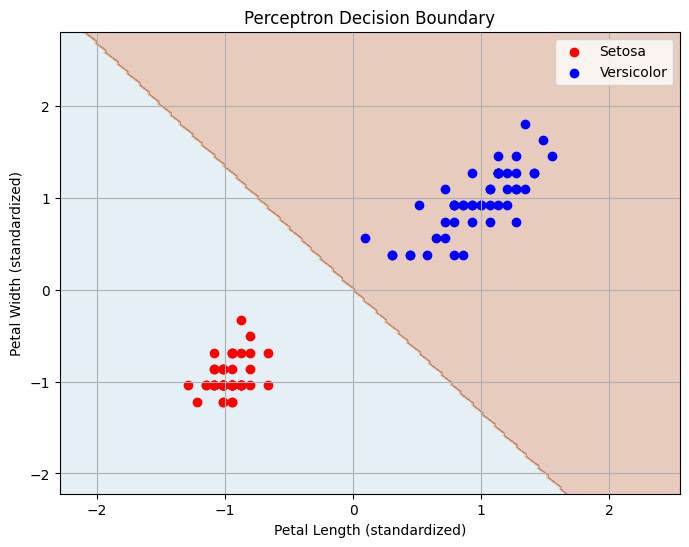

The decision boundary separates the two classes based on the Perceptron's learned weights. Points on either side are classified into different categories.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 2, 2:4]
y = y[y != 2]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

clf = Perceptron(eta0=0.1, random_state=42)
clf.fit(X_std, y)

x_min, x_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
y_min, y_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_std[y == 0, 0], X_std[y == 0, 1], color='red', label='Setosa')
plt.scatter(X_std[y == 1, 0], X_std[y == 1, 1], color='blue', label='Versicolor')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.savefig('decision_boundary.png')
plt.show()

print("The decision boundary separates the two classes based on the Perceptron's learned weights. Points on either side are classified into different categories.")
